In [9]:
%matplotlib inline
from scipy import misc
from glob import glob

#test_images = list(map(misc.imread, glob('test_images/*.jpg')))
vehicle_images = [misc.imread(x, mode='RGB') for x in glob('vehicles/*/*.png')]
non_vehicle_images = [misc.imread(x, mode='RGB') for x in glob('non-vehicles/*/*.png')]
print("Loaded", len(vehicle_images), "vehicle images and", len(non_vehicle_images), "non-vehicle images.")

Loaded 8792 vehicle images and 8968 non-vehicle images.


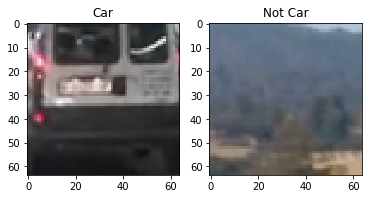

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1).set_title("Car")
plt.imshow(vehicle_images[0])
fig.add_subplot(1,2,2).set_title("Not Car")
plt.imshow(non_vehicle_images[0])
fig.savefig("output_images/car_not_car.png")
plt.show()

RGB
HSV
YUV
LUV
HLS


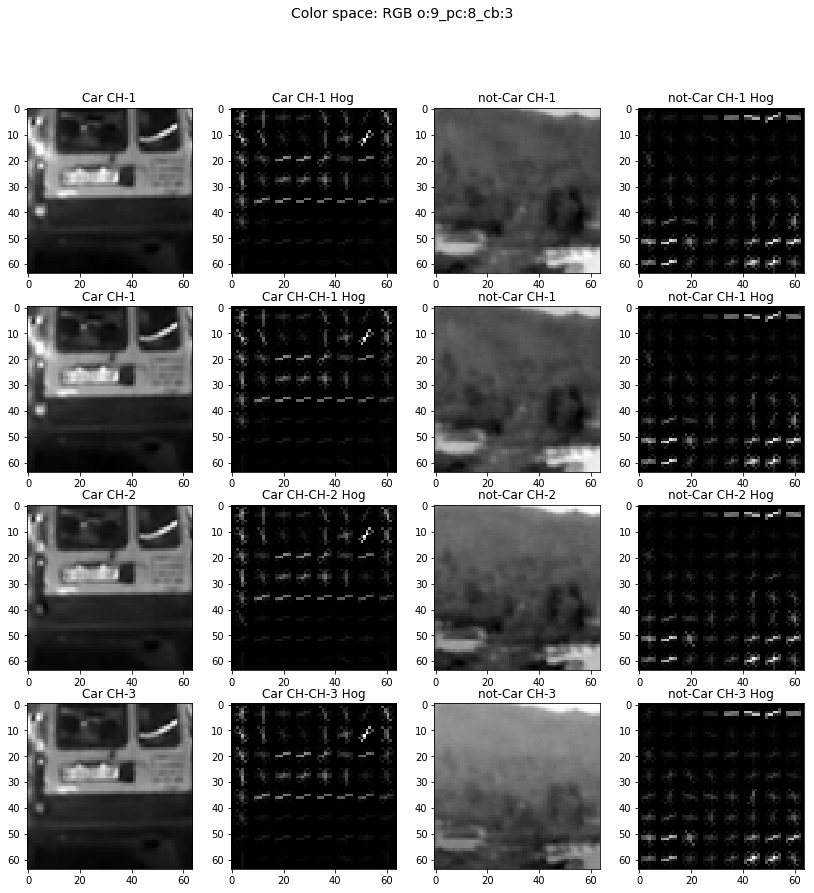

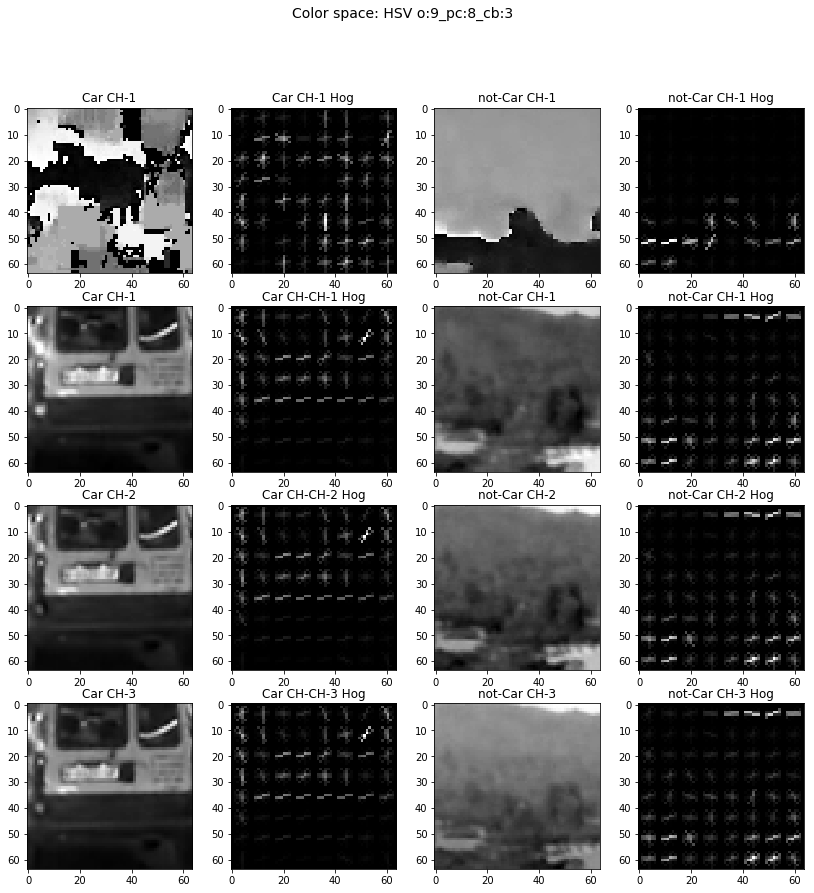

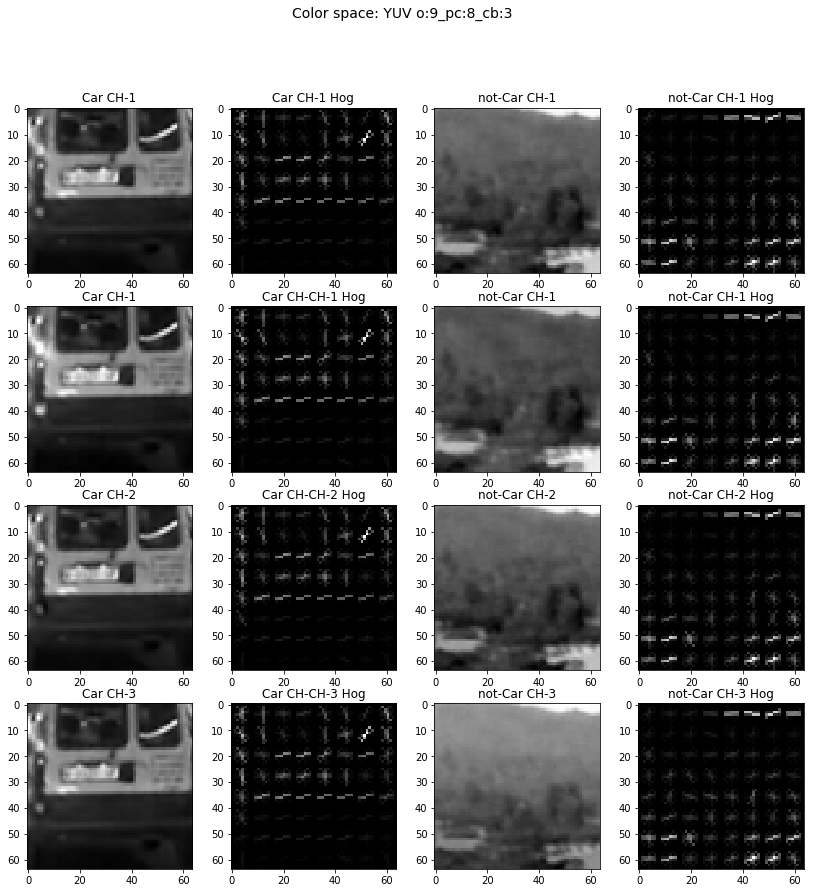

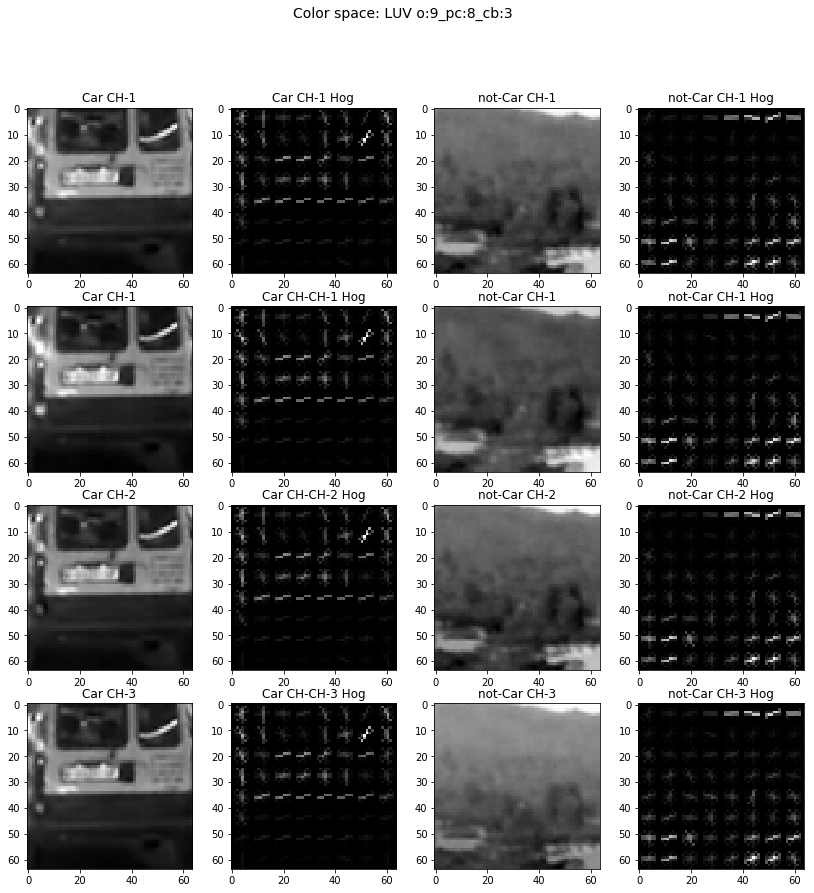

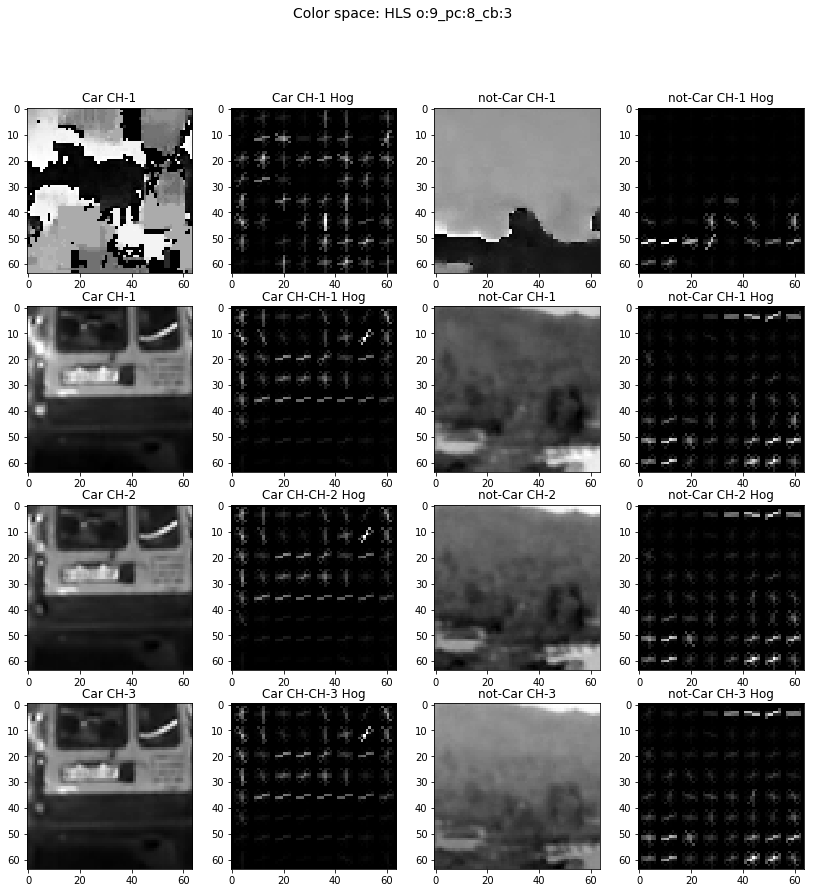

In [12]:
import cv2
from skimage import feature, color
import numpy as np

def do_hog(image, orientations, pixels_per_cell, cells_per_block):
    h, hog_image = skimage.feature.hog(image, orientations=orientations, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                       cells_per_block=(cells_per_block, cells_per_block), block_norm='L2-Hys', visualise=True,
                       transform_sqrt=False, feature_vector=True)
    plt.imshow(hog_image, cmap='gray')

def convert_image(image, colorspace):
    conversion = {'HSV': cv2.COLOR_RGB2HSV, 'YUV': cv2.COLOR_RGB2YUV, 'LUV': cv2.COLOR_RGB2LUV, 'HLS': cv2.COLOR_RGB2HLS}
    if colorspace in conversion:
        return cv2.cvtColor(image, conversion[colorspace])
    else:
        return np.copy(image)
    
for colorspace in ['RGB', 'HSV', 'YUV', 'LUV', 'HLS']:
    print(colorspace)
    vehicle_image = convert_image(vehicle_images[0], colorspace)
    non_vehicle_image = convert_image(non_vehicle_images[0], colorspace)

    for orientations in [9]:
        for pixels_per_cell in [8]:
            for cells_per_block in [3]:
                description = "o:" + str(orientations) + "_pc:" + str(pixels_per_cell) + "_cb:" + str(cells_per_block)
                fig = plt.figure(figsize = (14,14))
                fig.suptitle("Color space: " + colorspace + " " + description, fontsize=14)
                image = vehicle_image[:,:,0]
                fig.add_subplot(4,4,1).set_title("Car CH-1")
                plt.imshow(image, cmap='gray')
                fig.add_subplot(4,4,2).set_title("Car CH-1 Hog")
                do_hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)

                image = non_vehicle_image[:,:,0]
                fig.add_subplot(4,4,3).set_title("not-Car CH-1")
                plt.imshow(image, cmap='gray')
                fig.add_subplot(4,4,4).set_title("not-Car CH-1 Hog")
                do_hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)

                for channel in [1,2,3]:
                    channel_str = "CH-" + str(channel)
                    image = vehicle_images[0][:,:,channel - 1]
                    fig.add_subplot(4,4,4*channel + 1).set_title("Car " + channel_str)
                    plt.imshow(image, cmap='gray')
                    fig.add_subplot(4,4,4*channel + 2).set_title("Car CH-" + channel_str + " Hog")
                    do_hog(image, orientations=9, pixels_per_cell=8, cells_per_block=3)

                    image = non_vehicle_images[0][:,:,channel - 1]
                    fig.add_subplot(4,4,4*channel + 3).set_title("not-Car " + channel_str)
                    plt.imshow(image, cmap='gray')
                    fig.add_subplot(4,4,4*channel + 4).set_title("not-Car " + channel_str + " Hog")
                    do_hog(image, orientations=9, pixels_per_cell=8, cells_per_block=3)
                fig.savefig("output_images/HOG_" + colorspace + "_" + description + ".png")


In [ ]:
h.shape